<a href="https://colab.research.google.com/github/PacJ/Python/blob/master/p402_pandas_2020%EB%85%84_%EC%9D%B8%EA%B5%AC%EC%B4%9D%EC%A1%B0%EC%82%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 구글 코랩에서 한글 문제 해결  
- 아래 코드 설치를 한다.  
- 코랩 런타임 -> 런타임 다시 시작 한다.


In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-san

### 구글 드라이브 연동

In [1]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/DataAnalysis

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/DataAnalysis


### import

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

https://kosis.kr/index/index.do

In [4]:
df_kosis = pd.read_csv('./data/행정구역_시군구_별__성별_인구수_2020.csv', encoding='cp949')
df_kosis.head()

,행정구역(시군구)별,2020,2020.1,2020.2
0,행정구역(시군구)별,총인구수 (명),남자인구수 (명),여자인구수 (명)
1,전국,51829023,25841029,25987994
2,서울특별시,9668465,4701723,4966742
3,부산광역시,3391946,1661000,1730946
4,대구광역시,2418346,1193109,1225237


In [ ]:
df_kosis.tail()

,행정구역(시군구)별,2020,2020.1,2020.2
14,전라북도,1804104,896874,907230
15,전라남도,1851549,930615,920934
16,경상북도,2639422,1329211,1310211
17,경상남도,3340216,1681423,1658793
18,제주특별자치도,674635,338609,336026


In [ ]:
df_kosis.sample()

,행정구역(시군구)별,2020,2020.1,2020.2
6,광주광역시,1450062,717348,732714


In [ ]:
df_kosis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   행정구역(시군구)별  19 non-null     object
 1   2020        19 non-null     object
 2   2020.1      19 non-null     object
 3   2020.2      19 non-null     object
dtypes: object(4)
memory usage: 736.0+ bytes


In [ ]:
df_kosis.describe()

,행정구역(시군구)별,2020,2020.1,2020.2
count,19,19,19,19
unique,19,19,19,19
top,행정구역(시군구)별,총인구수 (명),남자인구수 (명),여자인구수 (명)
freq,1,1,1,1


In [ ]:
df_kosis.columns
type(df_kosis)

pandas.core.frame.DataFrame

In [ ]:
df_kosis['행정구역(시군구)별'].unique()

array(['행정구역(시군구)별', '전국', '서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시',
       '대전광역시', '울산광역시', '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도',
       '전라남도', '경상북도', '경상남도', '제주특별자치도'], dtype=object)

In [5]:
#0번째 인덱스의 row 제거(행정구역(시군구)별 총인구수 (명) 남자인구수 (명) 여자인구수 (명))
df = df_kosis[df_kosis['행정구역(시군구)별'] !='행정구역(시군구)별'].copy()
df.head()

,행정구역(시군구)별,2020,2020.1,2020.2
1,전국,51829023,25841029,25987994
2,서울특별시,9668465,4701723,4966742
3,부산광역시,3391946,1661000,1730946
4,대구광역시,2418346,1193109,1225237
5,인천광역시,2942828,1473943,1468885


In [6]:
# 전국 row 제거
df = df[df['행정구역(시군구)별'] != '전국'].copy()
df.head()

,행정구역(시군구)별,2020,2020.1,2020.2
2,서울특별시,9668465,4701723,4966742
3,부산광역시,3391946,1661000,1730946
4,대구광역시,2418346,1193109,1225237
5,인천광역시,2942828,1473943,1468885
6,광주광역시,1450062,717348,732714


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 2 to 18
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   행정구역(시군구)별  17 non-null     object
 1   2020        17 non-null     object
 2   2020.1      17 non-null     object
 3   2020.2      17 non-null     object
dtypes: object(4)
memory usage: 680.0+ bytes


In [ ]:
# 행정구역(시군구)별, 2020대상의 데이터를 가져오기

#df_2020 = df[['행정구역(시군구)별', '2020']]

#df_2020 = df.iloc[:, 0:2]
#df_2020 = df.iloc[:, [0,1]]
df_2020 = df.loc[:, '행정구역(시군구)별': '2020']

df_2020

,행정구역(시군구)별,2020
2,서울특별시,9668465
3,부산광역시,3391946
4,대구광역시,2418346
5,인천광역시,2942828
6,광주광역시,1450062
7,대전광역시,1463882
8,울산광역시,1136017
9,세종특별자치시,355831
10,경기도,13427014
11,강원도,1542840


In [ ]:
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 1 to 18
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   행정구역(시군구)별  18 non-null     object
 1   2020        18 non-null     object
dtypes: object(2)
memory usage: 432.0+ bytes


In [ ]:
print(dir(plt))

['Annotation', 'Arrow', 'Artist', 'AutoLocator', 'Axes', 'Button', 'Circle', 'Figure', 'FigureCanvasBase', 'FixedFormatter', 'FixedLocator', 'FormatStrFormatter', 'Formatter', 'FuncFormatter', 'GridSpec', 'IndexLocator', 'Line2D', 'LinearLocator', 'Locator', 'LogFormatter', 'LogFormatterExponent', 'LogFormatterMathtext', 'LogLocator', 'MaxNLocator', 'MultipleLocator', 'Normalize', 'NullFormatter', 'NullLocator', 'Number', 'PolarAxes', 'Polygon', 'Rectangle', 'ScalarFormatter', 'Slider', 'Subplot', 'SubplotTool', 'Text', 'TickHelper', 'Widget', '_INSTALL_FIG_OBSERVER', '_IP_REGISTERED', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_auto_draw_if_interactive', '_backend_mod', '_get_running_interactive_framework', '_interactive_bk', '_log', '_pylab_helpers', '_setp', '_setup_pyplot_info_docstrings', '_show', 'acorr', 'angle_spectrum', 'annotate', 'arrow', 'autoscale', 'autumn', 'axes', 'axhline', 'axhspan', 'axis', 'axvline', 'a

In [ ]:
df_2020 = df[['행정구역(시군구)별', '2020']]

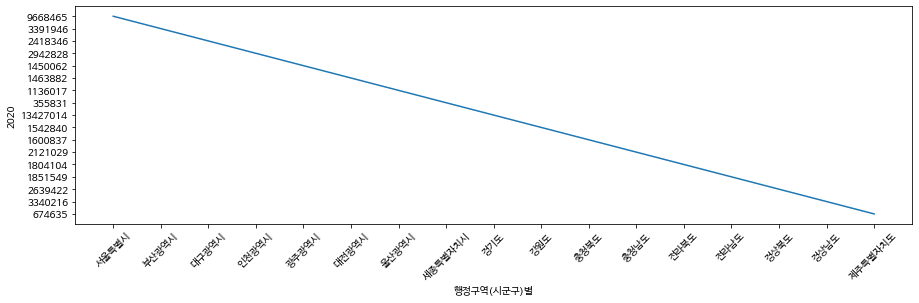

In [7]:
# y축 ('2020') object이므로 아래처럼 그래프가 그려진다.

plt.rc('font', family='NanumBarunGothic')
plt.figure(figsize=(15, 4))
plt.xticks(rotation=45)
#plt.plot(data = df, x='행정구역(시군구)별', y='2020')
#plt.plot(df['행정구역(시군구)별'],df['2020'])
sns.lineplot(data=df, x='행정구역(시군구)별', y='2020')

plt.show()

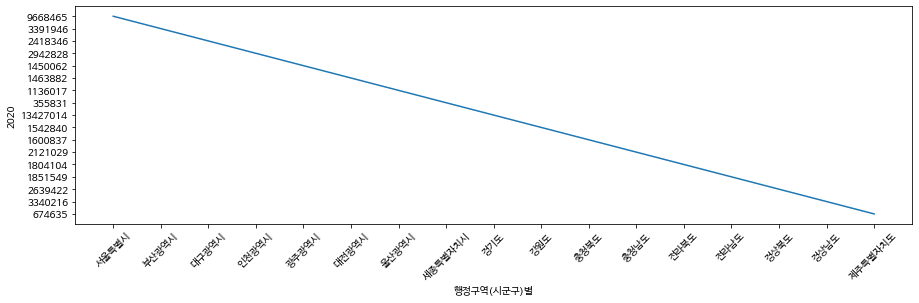

In [11]:
plt.rc('font', family='NanumBarunGothic')
plt.figure(figsize=(15,4))
plt.xticks(rotation=45)
sns.lineplot(data=df, x='행정구역(시군구)별', y= '2020')
plt.show()

In [12]:
# '2020', '2020.1', '2020.2' 컬럼의 데이터를 int로 변환한다.

df['2020'] = [ int(i) for i in df['2020']]
df['2020.1'] = [ int(i) for i in df['2020.1']]
df['2020.2'] = [ int(i) for i in df['2020.2']]

s = [(int(i),int(j),int(k)) for i, j, k in zip(df['2020'],df['2020.1'],df['2020.2'])]

#p = np.array(s)[0]
#df['2020'],df['2020.1'],df['2020.2'] = p[: ,0], p[: ,1], p[: ,2]
df['2020']

2      9668465
3      3391946
4      2418346
5      2942828
6      1450062
7      1463882
8      1136017
9       355831
10    13427014
11     1542840
12     1600837
13     2121029
14     1804104
15     1851549
16     2639422
17     3340216
18      674635
Name: 2020, dtype: int64

## 출생아수_시도시군구1997_2021

In [13]:
df_kosis = pd.read_csv('./data/출생아수_시도_시_군_구__1997_2021.csv', encoding='cp949')
df_kosis.head()

,시군구별,1997.01,1997.01.1,1997.01.2,1997.02,1997.02.1,1997.02.2,1997.03,1997.03.1,1997.03.2,...,2021.09.2,2021.10,2021.10.1,2021.10.2,2021.11,2021.11.1,2021.11.2,2021.12,2021.12.1,2021.12.2
0,시군구별,계 (명),남자 (명),여자 (명),계 (명),남자 (명),여자 (명),계 (명),남자 (명),여자 (명),...,여자 (명),계 (명),남자 (명),여자 (명),계 (명),남자 (명),여자 (명),계 (명),남자 (명),여자 (명)
1,전국,63268,33266,30002,58144,30086,28058,62160,32333,29827,...,10743,20749,10598,10151,19829,10201,9628,17179,8725,8454
2,서울특별시,13205,6886,6319,12239,6224,6015,13358,6947,6411,...,1814,3533,1839,1694,3513,1818,1695,3034,1557,1477
3,부산광역시,4201,2260,1941,3910,2104,1806,4304,2234,2070,...,627,1183,603,580,1043,549,494,888,458,430
4,대구광역시,3345,1764,1581,2994,1608,1386,3337,1815,1522,...,452,890,470,420,792,411,381,685,363,322


In [ ]:
df_kosis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Columns: 901 entries, 시군구별 to 2021.12.2
dtypes: object(901)
memory usage: 133.9+ KB


In [15]:
df_kosis.shape

(19, 901)

In [14]:
pd.options.display.max_columns=829

In [16]:
df_kosis.head()

,시군구별,1997.01,1997.01.1,1997.01.2,1997.02,1997.02.1,1997.02.2,1997.03,1997.03.1,1997.03.2,1997.04,1997.04.1,1997.04.2,1997.05,1997.05.1,1997.05.2,1997.06,1997.06.1,1997.06.2,1997.07,1997.07.1,1997.07.2,1997.08,1997.08.1,1997.08.2,1997.09,1997.09.1,1997.09.2,1997.10,1997.10.1,1997.10.2,1997.11,1997.11.1,1997.11.2,1997.12,1997.12.1,1997.12.2,1998.01,1998.01.1,1998.01.2,1998.02,1998.02.1,1998.02.2,1998.03,1998.03.1,1998.03.2,1998.04,1998.04.1,1998.04.2,1998.05,1998.05.1,1998.05.2,1998.06,1998.06.1,1998.06.2,1998.07,1998.07.1,1998.07.2,1998.08,1998.08.1,1998.08.2,1998.09,1998.09.1,1998.09.2,1998.10,1998.10.1,1998.10.2,1998.11,1998.11.1,1998.11.2,1998.12,1998.12.1,1998.12.2,1999.01,1999.01.1,1999.01.2,1999.02,1999.02.1,1999.02.2,1999.03,1999.03.1,1999.03.2,1999.04,1999.04.1,1999.04.2,1999.05,1999.05.1,1999.05.2,1999.06,1999.06.1,1999.06.2,1999.07,1999.07.1,1999.07.2,1999.08,1999.08.1,1999.08.2,1999.09,1999.09.1,1999.09.2,1999.10,1999.10.1,1999.10.2,1999.11,1999.11.1,1999.11.2,1999.12,1999.12.1,1999.12.2,2000.01,2000.01.1,2000.01.2,2000.02,2000.02.1,2000.02.2,2000.03,2000.03.1,2000.03.2,2000.04,2000.04.1,2000.04.2,2000.05,2000.05.1,2000.05.2,2000.06,2000.06.1,2000.06.2,2000.07,2000.07.1,2000.07.2,2000.08,2000.08.1,2000.08.2,2000.09,2000.09.1,2000.09.2,2000.10,2000.10.1,2000.10.2,2000.11,2000.11.1,2000.11.2,2000.12,2000.12.1,2000.12.2,2001.01,2001.01.1,2001.01.2,2001.02,2001.02.1,2001.02.2,2001.03,2001.03.1,2001.03.2,2001.04,2001.04.1,2001.04.2,2001.05,2001.05.1,2001.05.2,2001.06,2001.06.1,2001.06.2,2001.07,2001.07.1,2001.07.2,2001.08,2001.08.1,2001.08.2,2001.09,2001.09.1,2001.09.2,2001.10,2001.10.1,2001.10.2,2001.11,2001.11.1,2001.11.2,2001.12,2001.12.1,2001.12.2,2002.01,2002.01.1,2002.01.2,2002.02,2002.02.1,2002.02.2,2002.03,2002.03.1,2002.03.2,2002.04,2002.04.1,2002.04.2,2002.05,2002.05.1,2002.05.2,2002.06,2002.06.1,2002.06.2,2002.07,2002.07.1,2002.07.2,2002.08,2002.08.1,2002.08.2,2002.09,2002.09.1,2002.09.2,2002.10,2002.10.1,2002.10.2,2002.11,2002.11.1,2002.11.2,2002.12,2002.12.1,2002.12.2,2003.01,2003.01.1,2003.01.2,2003.02,2003.02.1,2003.02.2,2003.03,2003.03.1,2003.03.2,2003.04,2003.04.1,2003.04.2,2003.05,2003.05.1,2003.05.2,2003.06,2003.06.1,2003.06.2,2003.07,2003.07.1,2003.07.2,2003.08,2003.08.1,2003.08.2,2003.09,2003.09.1,2003.09.2,2003.10,2003.10.1,2003.10.2,2003.11,2003.11.1,2003.11.2,2003.12,2003.12.1,2003.12.2,2004.01,2004.01.1,2004.01.2,2004.02,2004.02.1,2004.02.2,2004.03,2004.03.1,2004.03.2,2004.04,2004.04.1,2004.04.2,2004.05,2004.05.1,2004.05.2,2004.06,2004.06.1,2004.06.2,2004.07,2004.07.1,2004.07.2,2004.08,2004.08.1,2004.08.2,2004.09,2004.09.1,2004.09.2,2004.10,2004.10.1,2004.10.2,2004.11,2004.11.1,2004.11.2,2004.12,2004.12.1,2004.12.2,2005.01,2005.01.1,2005.01.2,2005.02,2005.02.1,2005.02.2,2005.03,2005.03.1,2005.03.2,2005.04,2005.04.1,2005.04.2,2005.05,2005.05.1,2005.05.2,2005.06,2005.06.1,2005.06.2,2005.07,2005.07.1,2005.07.2,2005.08,2005.08.1,2005.08.2,2005.09,2005.09.1,2005.09.2,2005.10,2005.10.1,2005.10.2,2005.11,2005.11.1,2005.11.2,2005.12,2005.12.1,2005.12.2,2006.01,2006.01.1,2006.01.2,2006.02,2006.02.1,2006.02.2,2006.03,2006.03.1,2006.03.2,2006.04,2006.04.1,2006.04.2,2006.05,2006.05.1,2006.05.2,2006.06,2006.06.1,2006.06.2,2006.07,2006.07.1,2006.07.2,2006.08,2006.08.1,2006.08.2,2006.09,2006.09.1,2006.09.2,2006.10,2006.10.1,2006.10.2,2006.11,2006.11.1,2006.11.2,2006.12,2006.12.1,2006.12.2,2007.01,2007.01.1,2007.01.2,2007.02,2007.02.1,2007.02.2,2007.03,2007.03.1,2007.03.2,2007.04,2007.04.1,2007.04.2,2007.05,2007.05.1,2007.05.2,2007.06,2007.06.1,2007.06.2,2007.07,2007.07.1,2007.07.2,2007.08,2007.08.1,2007.08.2,2007.09,2007.09.1,2007.09.2,2007.10,2007.10.1,2007.10.2,2007.11,2007.11.1,2007.11.2,2007.12,2007.12.1,2007.12.2,2008.01,2008.01.1,2008.01.2,2008.02,2008.02.1,2008.02.2,2008.03,2008.03.1,2008.03.2,2008.04,2008.04.1,2008.04.2,2008.05,2008.05.1,2008.05.2,2008.06,2008.06.1,...,2010.07,2010.07.1,2010.07.2,2010.08,2010.08.1,2010.08.2,2010.09,2010.09.1,2010.09.2,2010.10,2010.10.1,2010.10.2,2010.11,2010.11.1,2010.1

In [17]:
df = df_kosis.melt(id_vars='시군구별')
df

,시군구별,variable,value
0,시군구별,1997.01,계 (명)
1,전국,1997.01,63268
2,서울특별시,1997.01,13205
3,부산광역시,1997.01,4201
4,대구광역시,1997.01,3345
...,...,...,...
17095,전라북도,2021.12.2,244
17096,전라남도,2021.12.2,261
17097,경상북도,2021.12.2,382
17098,경상남도,2021.12.2,478


In [ ]:
df.shape

(17100, 3)

In [ ]:
df['시군구별'].unique()

array(['시군구별', '전국', '서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시',
       '울산광역시', '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도',
       '경상북도', '경상남도', '제주특별자치도'], dtype=object)

In [18]:
df[df['시군구별']=='시군구별']

,시군구별,variable,value
0,시군구별,1997.01,계 (명)
19,시군구별,1997.01.1,남자 (명)
38,시군구별,1997.01.2,여자 (명)
57,시군구별,1997.02,계 (명)
76,시군구별,1997.02.1,남자 (명)
...,...,...,...
17005,시군구별,2021.11.1,남자 (명)
17024,시군구별,2021.11.2,여자 (명)
17043,시군구별,2021.12,계 (명)
17062,시군구별,2021.12.1,남자 (명)


In [19]:
# '시군구별' 아닌 데이터만 뽑아온다.
df = df[df['시군구별']!='시군구별'].copy()
df

,시군구별,variable,value
1,전국,1997.01,63268
2,서울특별시,1997.01,13205
3,부산광역시,1997.01,4201
4,대구광역시,1997.01,3345
5,인천광역시,1997.01,3646
...,...,...,...
17095,전라북도,2021.12.2,244
17096,전라남도,2021.12.2,261
17097,경상북도,2021.12.2,382
17098,경상남도,2021.12.2,478


In [ ]:
df['시군구별'].unique()

array(['전국', '서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시',
       '울산광역시', '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도',
       '경상북도', '경상남도', '제주특별자치도'], dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16200 entries, 1 to 17099
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   시군구별      16200 non-null  object
 1   variable  16200 non-null  object
 2   value     16200 non-null  object
dtypes: object(3)
memory usage: 506.2+ KB


In [ ]:
df.head()

,시군구별,variable,value
1,전국,1997.01,63268
2,서울특별시,1997.01,13205
3,부산광역시,1997.01,4201
4,대구광역시,1997.01,3345
5,인천광역시,1997.01,3646


In [ ]:
df.sample(5)

,시군구별,variable,value
10179,전라북도,2011.11.1,637
7603,부산광역시,2008.02.1,1089
10151,인천광역시,2011.11,2108
587,경상남도,1997.11,3566
12267,충청북도,2014.12,931


In [21]:
# Series으로 리턴
print(type(df['variable']))

print('str' in dir(pd.Series))

# StringMethods
print(type(df['variable'].str))
#print(df['variable'].str)

#Series로 리턴
print('Series로 리턴')
print(df['variable'].str.split('.'))

print(df['variable'].str.split('.')[1][0])

print(df['variable'].str.split('.')[1][1])

#DataFrame으로 리턴
print('DataFrame으로 리턴')
print(type(df['variable'].str.split('.', expand=True)))
print(df['variable'].str.split('.', expand=True))


<class 'pandas.core.series.Series'>
True
<class 'pandas.core.strings.accessor.StringMethods'>
Series로 리턴
1           [1997, 01]
2           [1997, 01]
3           [1997, 01]
4           [1997, 01]
5           [1997, 01]
             ...      
17095    [2021, 12, 2]
17096    [2021, 12, 2]
17097    [2021, 12, 2]
17098    [2021, 12, 2]
17099    [2021, 12, 2]
Name: variable, Length: 16200, dtype: object
1997
01
DataFrame으로 리턴
<class 'pandas.core.frame.DataFrame'>
          0   1     2
1      1997  01  None
2      1997  01  None
3      1997  01  None
4      1997  01  None
5      1997  01  None
...     ...  ..   ...
17095  2021  12     2
17096  2021  12     2
17097  2021  12     2
17098  2021  12     2
17099  2021  12     2

[16200 rows x 3 columns]


In [22]:
dir([1,2])

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__rmul__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'append',
 'clear',
 'copy',
 'count',
 'extend',
 'index',
 'insert',
 'pop',
 'remove',
 'reverse',
 'sort']

In [23]:
# Series으로 리턴
print(type(df['variable']))

#print((dir(pd.Series)).find('str'))

#StringMethods
print(type(df['variable'].str))

#Series로 리턴
print(type(df['variable'].str.split('.')))
print(type(df['variable'].str.split('.')))
print(type(df['variable'].str.split('.')))


<class 'pandas.core.series.Series'>
<class 'pandas.core.strings.accessor.StringMethods'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


#### expandbool, default False
- Expand the split strings into separate columns.

  - If True, return DataFrame/MultiIndex expanding dimensionality.

  - If False, return Series/Index, containing lists of strings.

In [24]:
df['연도'] = df['variable'].str.split('.', expand=True)[0]
df['월'] = df['variable'].str.split('.', expand=True)[1]
df['성별']=df['variable'].str.split('.', expand=True)[2]

In [25]:
df.sample(5)

,시군구별,variable,value,연도,월,성별
3972,전국,2002.10.2,19026,2002,10,2
4140,경상남도,2003.01.1,1551,2003,01,1
7244,인천광역시,2007.08,2358,2007,08,None
10928,부산광역시,2012.12.2,976,2012,12,2
13573,대전광역시,2016.11,895,2016,11,None


In [ ]:
# 성별에 None이 포함되어 있다.
df['성별'].unique()

array([None, '1', '2'], dtype=object)

In [ ]:
# None이 아닌 unique개수만 리턴한다.
df['성별'].nunique()

2

In [ ]:
df['성별'].value_counts()

1    5400
2    5400
Name: 성별, dtype: int64

In [26]:
#None을 값을 '전체'로 바꾸어 준다.
df['성별'] = df['성별'].fillna('전체')

In [ ]:
df.sample(5)

,시군구별,variable,value,연도,월,성별
3869,충청북도,2002.08.2,602,2002,08,2
10740,인천광역시,2012.09.1,1260,2012,09,1
6622,경기도,2006.09,9834,2006,09,전체
5587,전국,2005.03,41052,2005,03,전체
14033,강원도,2017.07,745,2017,07,전체


In [27]:
df['성별'] = df['성별'].replace('1', '남').replace('2', '여')
df.sample(10)
df['성별'].unique()

array(['전체', '1', '2'], dtype=object)

In [28]:
# Series에서만 사용할 수 있다.
# 빈도수를 계산한다.
df['성별'].value_counts()

전체    5400
1     5400
2     5400
Name: 성별, dtype: int64

In [29]:
df.columns

Index(['시군구별', 'variable', 'value', '연도', '월', '성별'], dtype='object')

In [30]:
#df = df.rename(mapper={'기간':'variable'}, axis=1)
#df.rename(columns={'variable': '기간', 'value':'출생아수'}, inplace=True)
df = df.rename(columns={'variable': '기간', 'value':'출생아수'})
df

,시군구별,기간,출생아수,연도,월,성별
1,전국,1997.01,63268,1997,01,전체
2,서울특별시,1997.01,13205,1997,01,전체
3,부산광역시,1997.01,4201,1997,01,전체
4,대구광역시,1997.01,3345,1997,01,전체
5,인천광역시,1997.01,3646,1997,01,전체
...,...,...,...,...,...,...
17095,전라북도,2021.12.2,244,2021,12,2
17096,전라남도,2021.12.2,261,2021,12,2
17097,경상북도,2021.12.2,382,2021,12,2
17098,경상남도,2021.12.2,478,2021,12,2


In [ ]:
df['출생아수'].unique()

array(['63268', '13205', '4201', ..., '106', '8454', '2612'], dtype=object)

In [ ]:
df.sample(10)

,시군구별,기간,출생아수,연도,월,성별
5098,광주광역시,2004.06.1,573,2004,06,남
958,울산광역시,1998.05.2,645,1998,05,여
7694,제주특별자치도,2008.03.2,239,2008,03,여
6541,인천광역시,2006.07.2,964,2006,07,여
4564,대구광역시,2003.09,2114,2003,09,전체
2346,세종특별자치시,2000.06,-,2000,06,전체
3396,전라북도,2001.12.1,851,2001,12,남
1308,경상북도,1998.11.2,1301,1998,11,여
5648,인천광역시,2005.04,1839,2005,04,전체
1129,울산광역시,1998.08.2,549,1998,08,여


In [ ]:
df['출생아수'].unique()

array(['63268', '13205', '4201', ..., '106', '8454', '2612'], dtype=object)

In [ ]:
# '출생아수' 컬럼에서 '-'을 찾기 위한 작업
df.sample(10)

,시군구별,기간,출생아수,연도,월,성별
4068,서울특별시,2002.12.1,3898,2002,12,남
15325,강원도,2019.05.2,347,2019,05,여
13421,대전광역시,2016.08.1,524,2016,08,남
5881,경기도,2005.08,8978,2005,08,전체
3405,대구광역시,2001.12.2,1018,2001,12,여
11744,서울특별시,2014.03,7253,2014,03,전체
11118,부산광역시,2013.04,2185,2013,04,전체
10004,경기도,2011.08.1,5305,2011,08,남
8372,충청북도,2009.03.2,593,2009,03,여
7082,전라북도,2007.05,1373,2007,05,전체


In [31]:
df['출생아수'] = df['출생아수'].replace('-', np.nan)

In [ ]:
df.sample(10)

,시군구별,기간,출생아수,연도,월,성별
4398,세종특별자치시,2003.06,NaN,2003,06,전체
16039,부산광역시,2020.06.1,648,2020,06,남
11572,전국,2013.12,31972,2013,12,전체
3123,대전광역시,2001.07.2,641,2001,07,여
4410,서울특별시,2003.06.1,3920,2003,06,남
3728,대구광역시,2002.06.1,907,2002,06,남
14253,부산광역시,2017.11,1603,2017,11,전체
11264,경상북도,2013.06.1,873,2013,06,남
11211,전국,2013.05.2,17344,2013,05,여
12025,경상남도,2014.07.2,1117,2014,07,여


In [32]:
# ValueError: cannot convert float NaN to integer
#df['출생아수'].astype(int)

df['출생아수'] = df['출생아수'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16200 entries, 1 to 17099
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시군구별    16200 non-null  object 
 1   기간      16200 non-null  object 
 2   출생아수    15660 non-null  float64
 3   연도      16200 non-null  object 
 4   월       16200 non-null  object 
 5   성별      16200 non-null  object 
dtypes: float64(1), object(5)
memory usage: 1.4+ MB


In [ ]:
df.sample(10)

,시군구별,기간,출생아수,연도,월,성별
6932,경상북도,2007.02.1,1085.0,2007,02,남
3174,전국,2001.08.2,20927.0,2001,08,여
14542,대전광역시,2018.04,789.0,2018,04,전체
4574,전라북도,2003.09,1469.0,2003,09,전체
10693,전라남도,2012.08.1,716.0,2012,08,남
4880,경상북도,2004.02.1,1093.0,2004,02,남
17072,경기도,2021.12.1,2598.0,2021,12,남
12349,제주특별자치도,2015.01.1,261.0,2015,01,남
11722,제주특별자치도,2014.02.1,235.0,2014,02,남
3835,경상북도,2002.08,2073.0,2002,08,전체


In [ ]:
df['출생아수'].describe()

count    15660.000000
mean      2954.615581
std       6495.725504
min         30.000000
25%        604.000000
50%       1002.000000
75%       1875.250000
max      63268.000000
Name: 출생아수, dtype: float64

### 전국별 성별 전체

In [33]:
df_all = df[df['성별']=='전체']
df_all.head()

,시군구별,기간,출생아수,연도,월,성별
1,전국,1997.01,63268.0,1997,01,전체
2,서울특별시,1997.01,13205.0,1997,01,전체
3,부산광역시,1997.01,4201.0,1997,01,전체
4,대구광역시,1997.01,3345.0,1997,01,전체
5,인천광역시,1997.01,3646.0,1997,01,전체


In [ ]:
df_all['성별'].unique()

array(['전체'], dtype=object)

In [34]:
df_all = df[(df['시군구별']=='전국') & (df['성별']=='전체')]
df_all.head()

,시군구별,기간,출생아수,연도,월,성별
1,전국,1997.01,63268.0,1997,01,전체
58,전국,1997.02,58144.0,1997,02,전체
115,전국,1997.03,62160.0,1997,03,전체
172,전국,1997.04,56949.0,1997,04,전체
229,전국,1997.05,55270.0,1997,05,전체


In [ ]:
print(df_all['시군구별'].unique())
print(df_all['성별'].unique())

['전국']
['전체']


## 전국_전체 pandas를 통한 시각화 작업

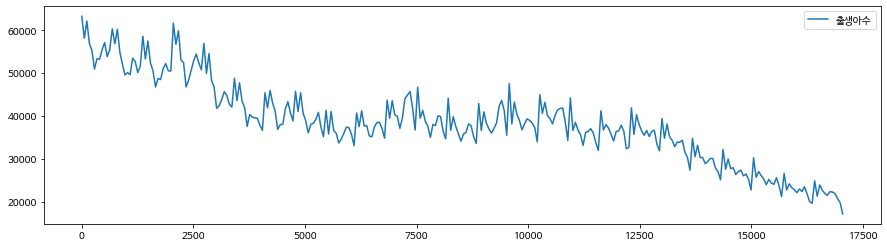

In [35]:
df_all.plot(figsize=(15,4))

,시군구별,기간,출생아수,연도,월,성별
1,전국,1997.01,63268.0,1997,01,전체
58,전국,1997.02,58144.0,1997,02,전체
115,전국,1997.03,62160.0,1997,03,전체
172,전국,1997.04,56949.0,1997,04,전체
229,전국,1997.05,55270.0,1997,05,전체
...,...,...,...,...,...,...
16816,전국,2021.08,22282.0,2021,08,전체
16873,전국,2021.09,21905.0,2021,09,전체
16930,전국,2021.10,20749.0,2021,10,전체
16987,전국,2021.11,19829.0,2021,11,전체


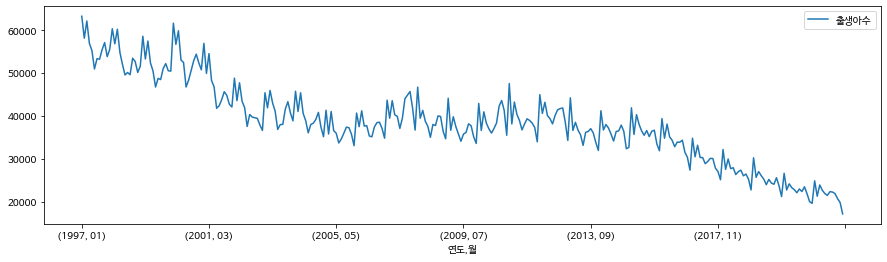

In [36]:
df_all.set_index(['연도', '월']).plot(figsize=(15,4))
df_all

In [ ]:
df_all.sample(5)
type(df_all)

pandas.core.frame.DataFrame

In [ ]:
# 설정 인덱스를 원상복귀 시켜준다. (즉, 연도와 월을 컬럼으로 되돌린다.)
df_all.reset_index()

,index,시군구별,기간,출생아수,연도,월,성별
0,1,전국,1997.01,63268.0,1997,01,전체
1,58,전국,1997.02,58144.0,1997,02,전체
2,115,전국,1997.03,62160.0,1997,03,전체
3,172,전국,1997.04,56949.0,1997,04,전체
4,229,전국,1997.05,55270.0,1997,05,전체
...,...,...,...,...,...,...,...
295,16816,전국,2021.08,22282.0,2021,08,전체
296,16873,전국,2021.09,21905.0,2021,09,전체
297,16930,전국,2021.10,20749.0,2021,10,전체
298,16987,전국,2021.11,19829.0,2021,11,전체


In [ ]:
df_all = df_all[['시군구별', '기간', '출생아수', '연도', '월', '성별']]
df_all.head()

,시군구별,기간,출생아수,연도,월,성별
1,전국,1997.01,63268.0,1997,01,전체
58,전국,1997.02,58144.0,1997,02,전체
115,전국,1997.03,62160.0,1997,03,전체
172,전국,1997.04,56949.0,1997,04,전체
229,전국,1997.05,55270.0,1997,05,전체


In [ ]:
df_all.iloc[:, 1:]

,기간,출생아수,연도,월,성별
1,1997.01,63268.0,1997,01,전체
58,1997.02,58144.0,1997,02,전체
115,1997.03,62160.0,1997,03,전체
172,1997.04,56949.0,1997,04,전체
229,1997.05,55270.0,1997,05,전체
...,...,...,...,...,...
16816,2021.08,22282.0,2021,08,전체
16873,2021.09,21905.0,2021,09,전체
16930,2021.10,20749.0,2021,10,전체
16987,2021.11,19829.0,2021,11,전체


In [ ]:
df_all.reset_index(drop=True)

,시군구별,기간,출생아수,연도,월,성별
0,전국,1997.01,63268.0,1997,01,전체
1,전국,1997.02,58144.0,1997,02,전체
2,전국,1997.03,62160.0,1997,03,전체
3,전국,1997.04,56949.0,1997,04,전체
4,전국,1997.05,55270.0,1997,05,전체
...,...,...,...,...,...,...
295,전국,2021.08,22282.0,2021,08,전체
296,전국,2021.09,21905.0,2021,09,전체
297,전국,2021.10,20749.0,2021,10,전체
298,전국,2021.11,19829.0,2021,11,전체


,시군구별,기간,출생아수,연도,월,성별
1,전국,1997.01,63268.0,1997,01,전체
58,전국,1997.02,58144.0,1997,02,전체
115,전국,1997.03,62160.0,1997,03,전체
172,전국,1997.04,56949.0,1997,04,전체
229,전국,1997.05,55270.0,1997,05,전체
...,...,...,...,...,...,...
16816,전국,2021.08,22282.0,2021,08,전체
16873,전국,2021.09,21905.0,2021,09,전체
16930,전국,2021.10,20749.0,2021,10,전체
16987,전국,2021.11,19829.0,2021,11,전체


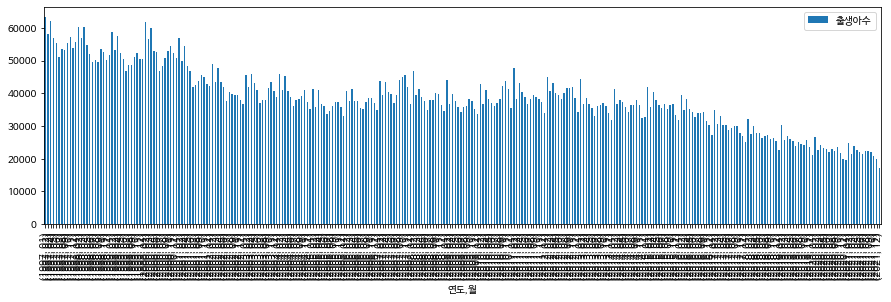

In [37]:
#df_all.set_index(['연도', '월']).plot(kind='bar', figsize=(15,4))
df_all.set_index(['연도', '월']).plot.bar(figsize=(15,4))
df_all

In [ ]:
# 최근 2년 데이터 가져오기
df_all[-24:]

,시군구별,기간,출생아수,연도,월,성별
15733,전국,2020.01,26646.0,2020,01,전체
15790,전국,2020.02,22759.0,2020,02,전체
15847,전국,2020.03,24190.0,2020,03,전체
15904,전국,2020.04,23299.0,2020,04,전체
15961,전국,2020.05,22847.0,2020,05,전체
16018,전국,2020.06,22117.0,2020,06,전체
16075,전국,2020.07,22999.0,2020,07,전체
16132,전국,2020.08,22402.0,2020,08,전체
16189,전국,2020.09,23499.0,2020,09,전체
16246,전국,2020.10,21884.0,2020,10,전체


In [ ]:
df_all['연도'].unique()

array(['1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020',
       '2021'], dtype=object)

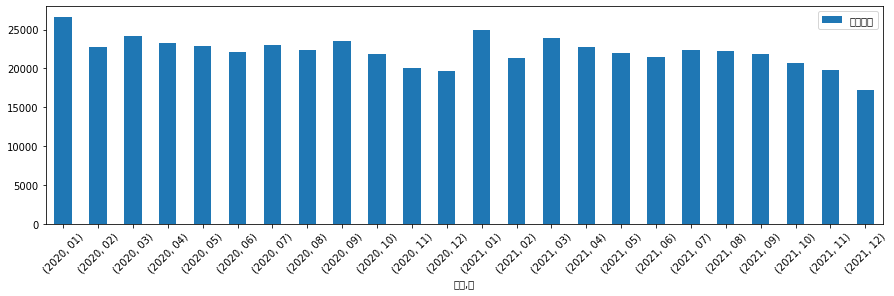

In [ ]:
# 최근 2년 (24개만) 가져와서 그래프로 그려준다.
df_all[-24:].set_index(['연도', '월']).plot(kind='bar', figsize=(15,4), rot=45)

In [ ]:
df['a']=pd.Series([1,2,3])

In [ ]:
df.head()

,시군구별,기간,출생아수,연도,월,성별,a
1,전국,1997.01,63268.0,1997,01,전체,2.0
2,서울특별시,1997.01,13205.0,1997,01,전체,3.0
3,부산광역시,1997.01,4201.0,1997,01,전체,NaN
4,대구광역시,1997.01,3345.0,1997,01,전체,NaN
5,인천광역시,1997.01,3646.0,1997,01,전체,NaN


In [ ]:
df['b']=pd.Series([1,2,3])

In [ ]:
df_all = df
df_all

,시군구별,기간,출생아수,연도,월,성별,a,b
1,전국,1997.01,63268.0,1997,01,전체,2.0,2.0
2,서울특별시,1997.01,13205.0,1997,01,전체,3.0,3.0
3,부산광역시,1997.01,4201.0,1997,01,전체,NaN,NaN
4,대구광역시,1997.01,3345.0,1997,01,전체,NaN,NaN
5,인천광역시,1997.01,3646.0,1997,01,전체,NaN,NaN
...,...,...,...,...,...,...,...,...
17095,전라북도,2021.12.2,244.0,2021,12,여,NaN,NaN
17096,전라남도,2021.12.2,261.0,2021,12,여,NaN,NaN
17097,경상북도,2021.12.2,382.0,2021,12,여,NaN,NaN
17098,경상남도,2021.12.2,478.0,2021,12,여,NaN,NaN


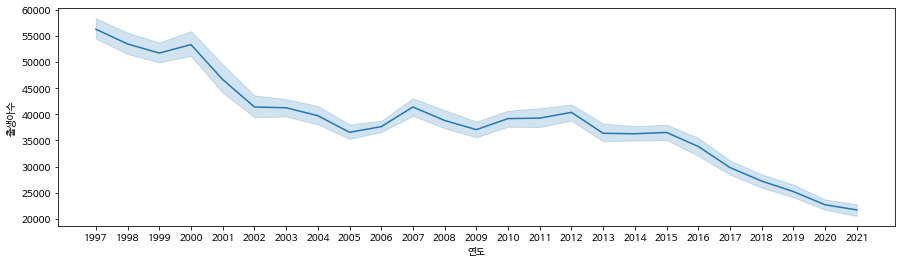

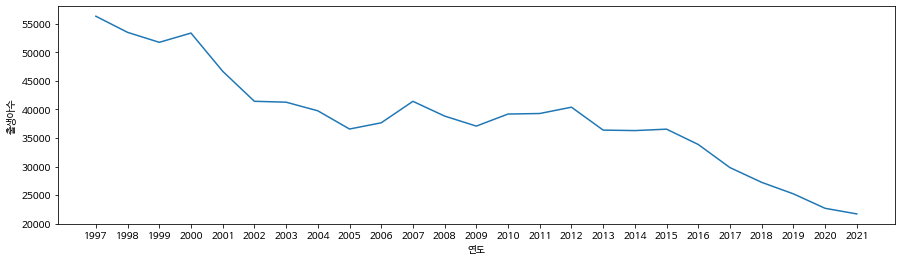

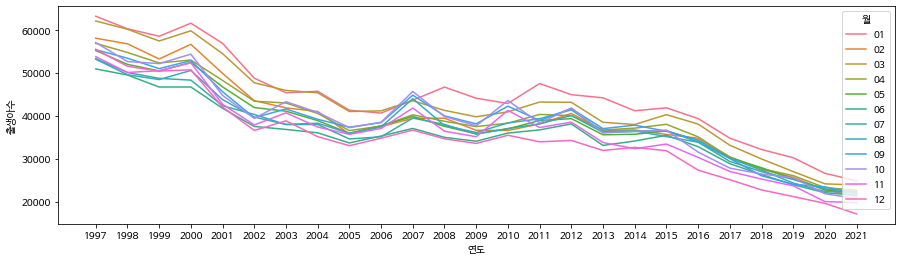

In [41]:
plt.figure(figsize=(15, 4))
sns.lineplot(data=df_all, x='연도', y='출생아수')

plt.figure(figsize=(15, 4))
sns.lineplot(data=df_all, x='연도', y='출생아수', ci=None)

plt.figure(figsize=(15, 4))
sns.lineplot(data=df_all, x='연도', y='출생아수', ci=None, hue='월')

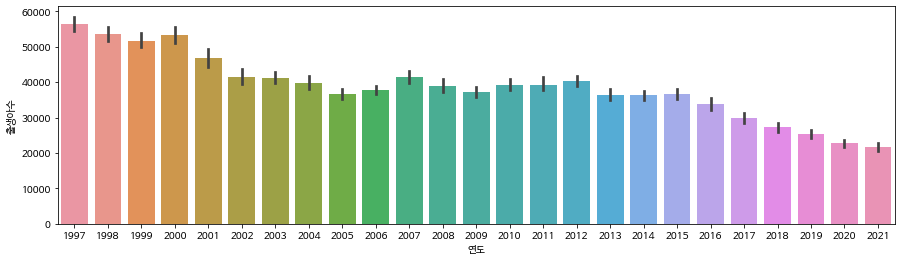

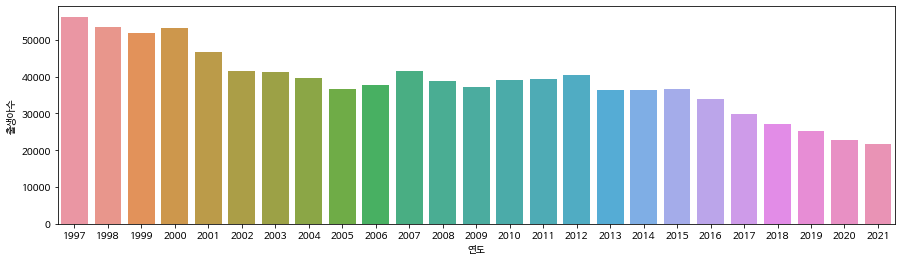

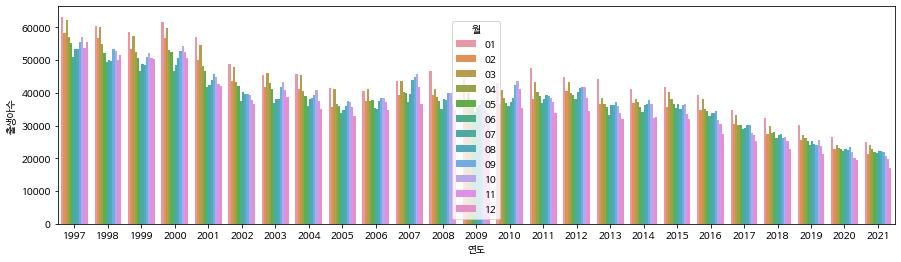

In [42]:
#barplot
plt.figure(figsize=(15, 4))
sns.barplot(data=df_all, x='연도', y='출생아수')

plt.figure(figsize=(15, 4))
sns.barplot(data=df_all, x='연도', y='출생아수', ci=None)

plt.figure(figsize=(15, 4))
sns.barplot(data=df_all, x='연도', y='출생아수', ci=None, hue='월')

#### 지역별 출생아수

In [ ]:
df['a', 'b', 'c'].drop()
df.drop(columns=['a','b','c'])

In [43]:
df_local = df[df['시군구별'] != '전국'].copy()
df_local

,시군구별,기간,출생아수,연도,월,성별
2,서울특별시,1997.01,13205.0,1997,01,전체
3,부산광역시,1997.01,4201.0,1997,01,전체
4,대구광역시,1997.01,3345.0,1997,01,전체
5,인천광역시,1997.01,3646.0,1997,01,전체
6,광주광역시,1997.01,2166.0,1997,01,전체
...,...,...,...,...,...,...
17095,전라북도,2021.12.2,244.0,2021,12,2
17096,전라남도,2021.12.2,261.0,2021,12,2
17097,경상북도,2021.12.2,382.0,2021,12,2
17098,경상남도,2021.12.2,478.0,2021,12,2


In [44]:
df_local['시군구별'].unique()

array(['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시',
       '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도',
       '경상남도', '제주특별자치도'], dtype=object)

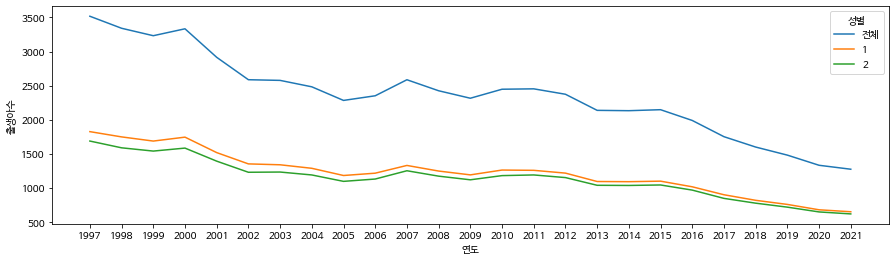

In [45]:
plt.figure(figsize=(15,4))
sns.lineplot(data=df_local, x='연도', y='출생아수', hue='성별', ci=None)

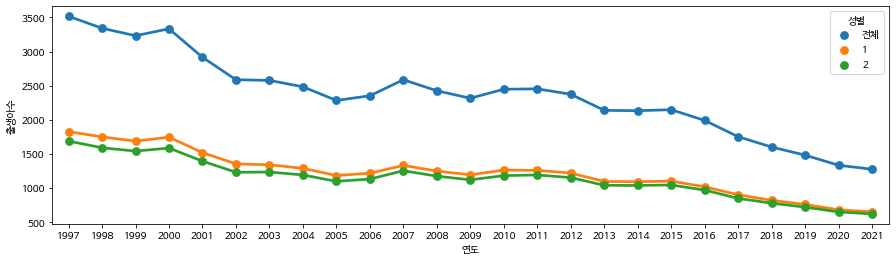

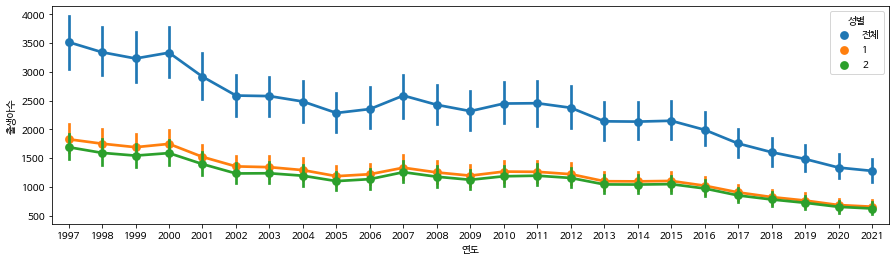

In [47]:
plt.figure(figsize=(15,4))
sns.pointplot(data=df_local, x='연도', y='출생아수', hue='성별', ci=None)

plt.figure(figsize=(15,4))
sns.pointplot(data=df_local, x='연도', y='출생아수', hue='성별')

In [48]:
df_local = df_local[df['성별']=='전체']
df_local.head()

<ipython-input-48-ab8deff3a083>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_local = df_local[df['성별']=='전체']


,시군구별,기간,출생아수,연도,월,성별
2,서울특별시,1997.01,13205.0,1997,01,전체
3,부산광역시,1997.01,4201.0,1997,01,전체
4,대구광역시,1997.01,3345.0,1997,01,전체
5,인천광역시,1997.01,3646.0,1997,01,전체
6,광주광역시,1997.01,2166.0,1997,01,전체


In [49]:
df_local['성별'].unique()

array(['전체'], dtype=object)

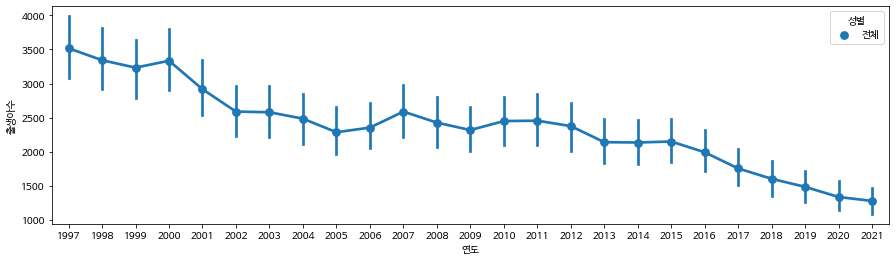

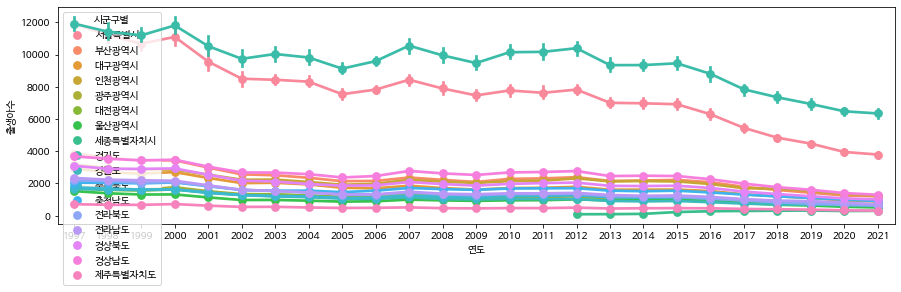

In [50]:
plt.figure(figsize=(15,4))
sns.pointplot(data=df_local, x='연도', y='출생아수', hue='성별')

plt.figure(figsize=(15,4))
sns.pointplot(data=df_local, x='연도', y='출생아수', hue='시군구별')

In [51]:
df_loc_2 = df_local[df_local['시군구별'].isin(['서울특별시', '경기도', '세종특별자치시'])]
df_loc_2.head()

,시군구별,기간,출생아수,연도,월,성별
2,서울특별시,1997.01,13205.0,1997,01,전체
9,세종특별자치시,1997.01,NaN,1997,01,전체
10,경기도,1997.01,13440.0,1997,01,전체
59,서울특별시,1997.02,12239.0,1997,02,전체
66,세종특별자치시,1997.02,NaN,1997,02,전체


In [52]:
df_loc_2['시군구별'].unique()

array(['서울특별시', '세종특별자치시', '경기도'], dtype=object)

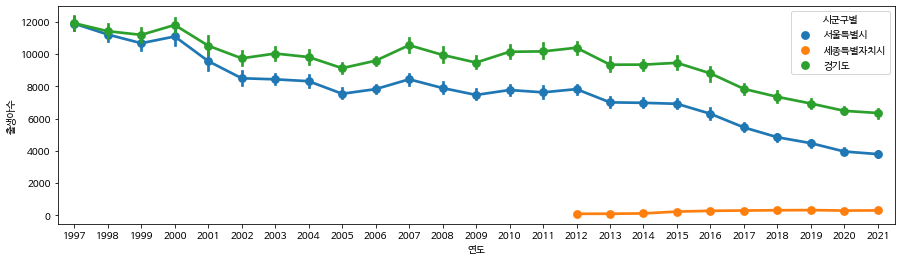

In [53]:
plt.figure(figsize=(15,4))
sns.pointplot(data=df_loc_2, x='연도', y='출생아수', hue='시군구별')

In [56]:
df_loc_3 = df_loc_2[df_loc_2['시군구별']=='세종특별자치시'].dropna()
df_loc_3.head()

,시군구별,기간,출생아수,연도,월,성별
10269,세종특별자치시,2012.01,73.0,2012,01,전체
10326,세종특별자치시,2012.02,74.0,2012,02,전체
10383,세종특별자치시,2012.03,92.0,2012,03,전체
10440,세종특별자치시,2012.04,84.0,2012,04,전체
10497,세종특별자치시,2012.05,72.0,2012,05,전체


In [57]:
df_loc_3['시군구별'].unique()

array(['세종특별자치시'], dtype=object)

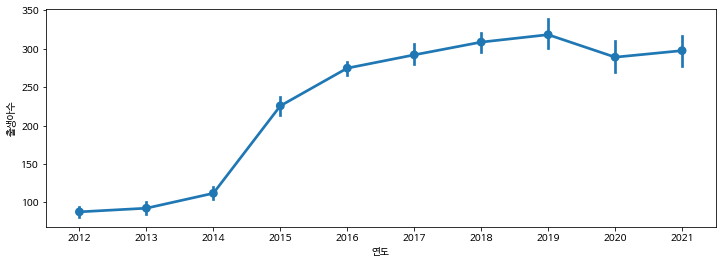

In [59]:
plt.figure(figsize=(12,4))
sns.pointplot(data=df_loc_3, x='연도', y='출생아수')